In [51]:
import numpy as np
import pandas as pd
# from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter

In [2]:
dataset = pd.read_csv('../datasets/oral_node2vec_400D_new.csv')

In [28]:
print(type(dataset.iloc[:, 0].values))

<class 'numpy.ndarray'>


In [30]:
y = dataset.iloc[:, 0].values  # 读取第一列 label 信息

In [32]:
X = dataset.iloc[:, 1:].values  # 读取特征矩阵数据

In [43]:
print(len(X[:, 1]))  # 特征矩阵行数

19247


In [44]:
assert(len(X[:, 1]) == np.count_nonzero(y))  # 确保数据样本数一致

In [47]:
print('\nClass 1: ', (y == 1).sum())  # 输出正负样本数
print('\nClass 2: ', (y == 2).sum())


Class 1:  169

Class 2:  19078


In [50]:
# Apply SMOTE + ENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X, y)

In [58]:
print((y_resampled == 2).sum())

17663


In [63]:
print((Counter(y).items()))  # 输出原始样本分布和生成 fake data 后的样本分布
print('After resampled: ', Counter(y_resampled).items())

dict_items([(1, 169), (2, 19078)])
After resampled:  dict_items([(1, 19078), (2, 17663)])


In [64]:
from sklearn.decomposition import PCA  # 使用 PCA 降维便于可视化对比

In [77]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=3)
# Fit and transform x to visualise inside a 3D feature space
X_vis = pca.fit_transform(X)
X_res_vis = pca.transform(X_resampled)

In [79]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

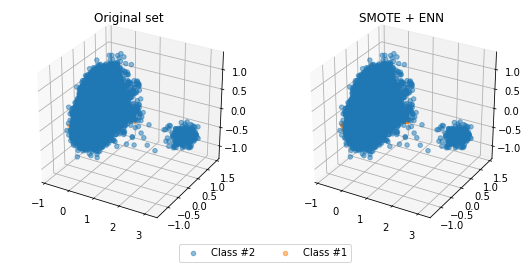

In [81]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# set up the axes for the first plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

c0 = ax1.scatter(X_vis[y == 2, 0], X_vis[y == 2, 1], X_vis[y == 2, 2], label="Class #2", alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], X_vis[y == 1, 2], label="Class #1", alpha=0.5)
ax1.set_title('Original set')

# set up the axes for the second plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax2.scatter(X_res_vis[y_resampled == 2, 0], X_res_vis[y_resampled == 2, 1], X_res_vis[y_resampled == 2, 2], label="Class #2", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], X_res_vis[y_resampled == 1, 2], label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + ENN')

# make nice plotting
fig.legend((c0, c1), ('Class #2', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)

In [82]:
# Instanciate a PCA object for the sake of easy visualisation
pca_two = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca_two.fit_transform(X)
X_res_vis = pca_two.transform(X_resampled)

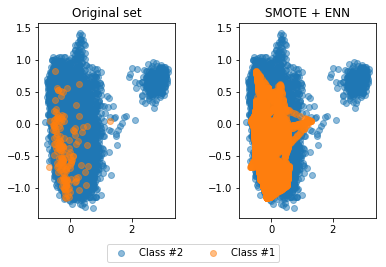

In [83]:
# Two subplots, unpack the axes array immediately
fig, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 2, 0], X_vis[y == 2, 1], label="Class #2", alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 2, 0], X_res_vis[y_resampled == 2, 1], label="Class #2", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + ENN')

# make nice plotting
fig.legend((c0, c1), ('Class #2', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)